In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv('titanic_train.csv')

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


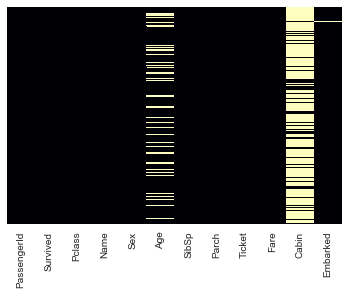

In [84]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

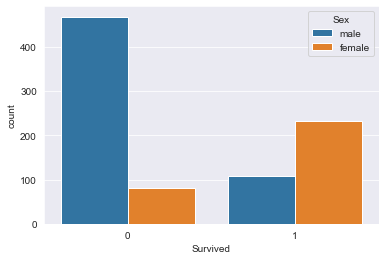

In [85]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)

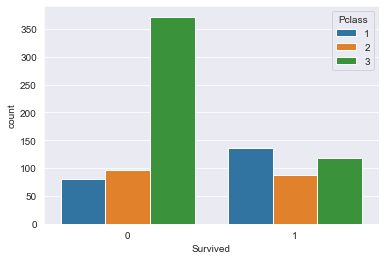

In [86]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

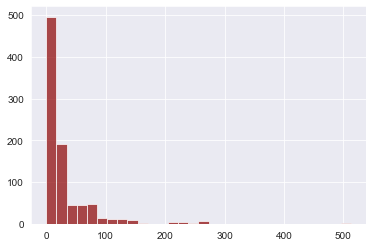

In [87]:
df['Fare'].hist(bins=30,color='darkred',alpha=0.7)

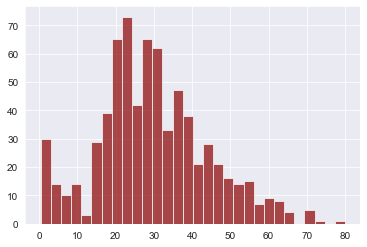

In [88]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

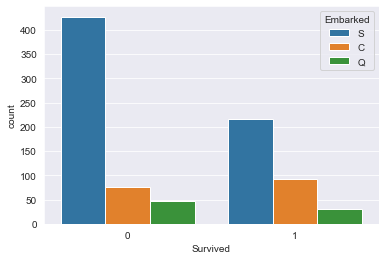

In [89]:
sns.countplot(x='Survived',data=df,hue='Embarked')

### Data Cleaning

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### age,cabin have two many null values whereas embarked is having 2 null values

In [91]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

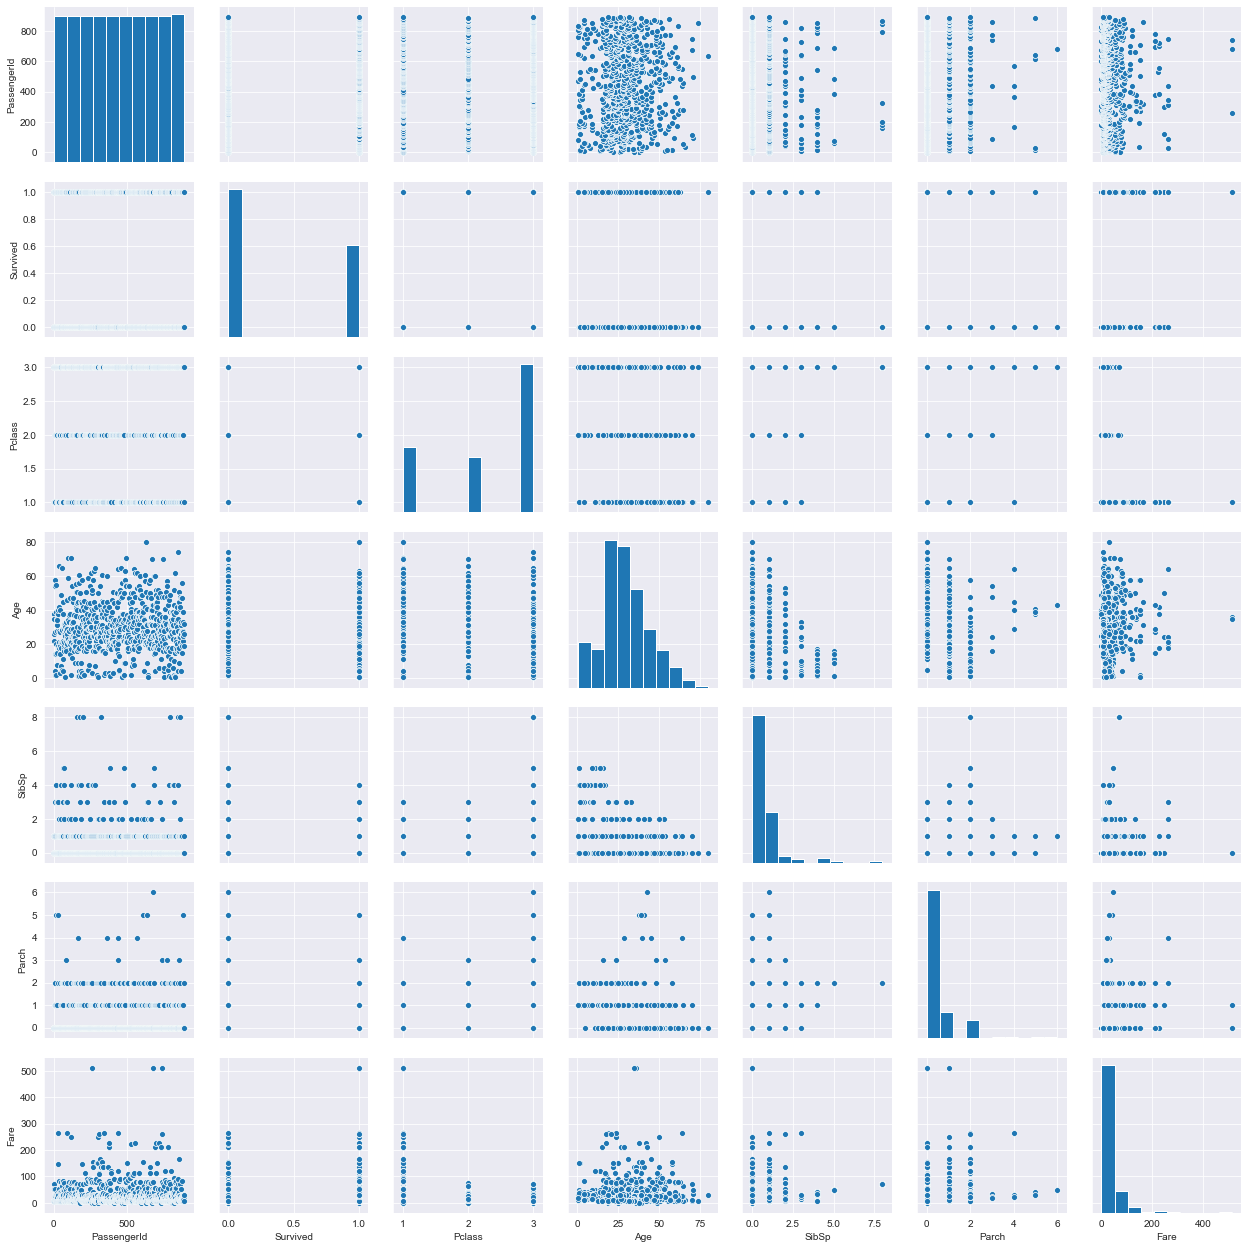

In [92]:
sns.pairplot(df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']])

In [93]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


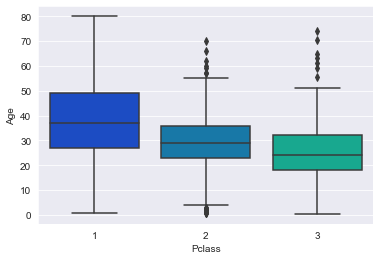

In [94]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

##### Imputing the missing values in age using Pclass as if we drop those rows with missing values, it may end up increasing the bias making the estimator oversimplied leading to low variance and thus underfitting if the missing values are dense i.e. high in number.


In [95]:
print('Mean Age at Pclass=1: ',df.loc[df['Pclass']==1]['Age'].mean())
print('Mean Age at Pclass=2: ',df.loc[df['Pclass']==2]['Age'].mean())
print('Mean Age at Pclass=3: ',df.loc[df['Pclass']==3]['Age'].mean())

Mean Age at Pclass=1:  38.233440860215055
Mean Age at Pclass=2:  29.87763005780347
Mean Age at Pclass=3:  25.14061971830986


In [96]:
def age_imputing(x):
    Age = x[0]
    Pclass = x[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [97]:
df['Age'] = df[['Age','Pclass']].apply(age_imputing,axis=1)

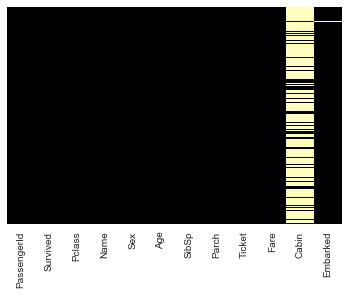

In [98]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [99]:
# dropping cabin because of excessive missing values and dropping the rows corresponding to the missing embarked 
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)# dropping 2 rows from embarked

In [117]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [119]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [105]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Dropping embarked as well, as it may increase the bias if converted into dummy variable because 3 variables.

In [106]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [107]:
df.drop(['Sex','Name','Ticket','PassengerId','Embarked'],axis=1,inplace=True)

In [108]:
df = pd.concat([df,sex],axis=1)

In [120]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [121]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [122]:
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male']]
y=df['Survived']

#### Train test split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

#### Model fit and predict 
_______
##### Logistic Regression
_______

In [124]:
log_r = LogisticRegression()
log_r.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
y_pred = log_r.predict(X_test)

_______
### Model Eval
__________

#### Accuracy

In [139]:
score=accuracy_score(y_test,y_pred)

In [140]:
print('Accuracy is:',score)

Accuracy is: 0.8146067415730337


#### Confusion matrix

In [130]:
c_mat=confusion_matrix(y_test,y_pred)
c_mat

array([[91, 18],
       [15, 54]], dtype=int64)

#### Classification Report

In [132]:
c_rep=classification_report(y_test,y_pred)

In [137]:
print(c_rep)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

